In [1]:
import numpy as np

# Parameters
c = 343.0  # Speed of sound in air (m/s)
h = 1.0    # Spatial step size (meters)
N = 100    # Number of spatial grid points along each axis
x = np.linspace(0, (N - 1) * h, N)
y = np.linspace(0, (N - 1) * h, N)
X, Y = np.meshgrid(x, y)

# Stability condition (Courant–Friedrichs–Lewy condition)
safety_factor = 0.5
delta_t = (h / c) * (1 / np.sqrt(2)) * safety_factor  # Time step size
s = c * delta_t / h  # CFL number
s2 = s * s

# Initialize wave amplitude arrays
u_past = np.zeros((N, N))     # Wave amplitude at time n-1
u_present = np.zeros((N, N))  # Wave amplitude at time n
u_future = np.zeros((N, N))   # Wave amplitude at time n+1

# Initial condition: Gaussian pulse at the center
xc = (N - 1) * h / 2
yc = (N - 1) * h / 2
sigma = 3 * h
u_present[:, :] = np.exp(-((X - xc) ** 2 + (Y - yc) ** 2) / (2 * sigma ** 2))
u_past[:, :] = u_present[:, :]

def update():
    global u_present, u_past, u_future

    # Compute the wave amplitude at the next time step
    u_future[1:-1, 1:-1] = (2 * u_present[1:-1, 1:-1] - u_past[1:-1, 1:-1] +
                            s2 * (u_present[2:, 1:-1] + u_present[:-2, 1:-1] +
                                  u_present[1:-1, 2:] + u_present[1:-1, :-2] -
                                  4 * u_present[1:-1, 1:-1]))
    # Apply boundary conditions (absorbing boundaries)
    u_future[0, :] = u_future[-1, :] = u_future[:, 0] = u_future[:, -1] = 0

    # Update the wave amplitude arrays for the next iteration
    u_past, u_present = u_present, u_future.copy()

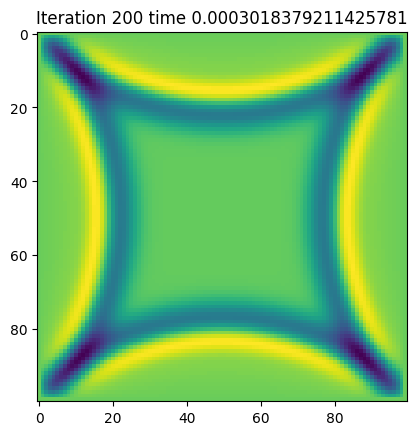

In [2]:
%matplotlib inline

import time

import matplotlib.pyplot as plt
from IPython.display import clear_output

for i in range(200):

    start_time = time.time()
    update()
    processing_time = time.time() - start_time
    
    clear_output(wait=True)
    plt.imshow(u_present)
    plt.title(f"Iteration {i+1} time {processing_time}")
    plt.show()